### Monetary policy for decentralized networks via empirical analysis

A critical macroeconomic parameter for most decentralized networks is the initial rate at which new tokens are minted (and distributed to actively staking service-providers as a predictable subsidy/incentive) – the _genesis inflation rate_. This analysis aims to substantiate, via empirical analysis, arguments for possible inflation rates at genesis and subsequent monetary policy – by looking at public data from live networks, primarily those secured by staking/Proof-of-Stake.

The goal of the protocol designer here is deceptively simple – select an initial rate that's neither too high nor too low. There are issues with both extremes:

_'High' inflation rate_
- Given a finite supply, a high initial rate implies a shorter-lived era of subsidies. This may not budget enough time for customer adoption and a corresponding transaction fee market to mature. 
- If the subsidy is too large relative to the typical value of transaction fees, then the incentive to earn fees may be blunted. This is particularly risky if the service-provider action/duty required to collect subsidies does not align well with the equivalent to earn fees, and that latter duty has a greater effect on service quality.
- A primary purpose of subsidization is supporting the upfront and maintenance costs of service-provider operations. In the case of NuCypher and some service-layer/staking networks, these overheads are relatively low – particularly when compared to Proof-of-Work mining or networks with very punitive slashing conditions (e.g. for double-signing). Hence, a similarly high inflation rate may be overkill.
- A generous subsidy may attract _too many_ service-providers to the network, which means that the first trickle of customers and jobs will be spread more thinly amongst them. Oversupply delays the moment where fees alone are able to sustain service-provider operations. 
- The greater the value of a subsidy, the further from a customer/fee-driven 'reality' a service-provider's economic set-up is likely to be (for example, in terms of operational efficiency), and the longer it may take for the fee market to catch up – if it catches up at all. 
- Relatedly, a overly generous subsidy may lead some service-providers to offer unsustainably low prices initially, with the intention of raising prices later once the subsidy dries up [1]. Any customers who have become reliant on the service, but are unable to afford the new higher price point, will see their business thrown into jeoapardy. This prospect will make it harder for would-be network adopters to plan an integration and justify the associated risks and cost-sinking.
- Higher subsidies worsen the impact and/or risk of tax liabilities.  

_'Low' inflation rate_
- Given competition between networks for competent service-providers, who have finite time and resources, a low incentive may be insufficient to draw and/or maintain a requisite number, diversity or minimum competence level of service-providers. If a truly extreme version of this scenario transpires, we may see supply failing to satisfy demand. 
- If service-providers 
- A low value subsidy may lead to collective price-hiking in order to stay afloat [1], which will delay or impede adoption of the network. 
- An ungenerous subsidy may exclude smaller service-providers with less upfront resources, limiting participation to institutional/professional operators. 

[1] these scenarios apply in epochs where a free market (price diversity) is enabled or encouraged – i.e. no fixed, enforced, universal pricing. 

From these qualitative arguments, we may refine the designer's goal: to select a genesis inflation rate that is _as low as possible, without compromising the abundance of supply or the operational feasibility of service-providers_. 

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import datetime
from scipy import stats

Let's begin with what should be a simple exercise –  finding (1) the genesis inflation rate for prominent proof-of-stake network and (2) the performance of the native token's exchange rate with Bitcoin over the first 6 months of the network's existence. We opt for the token/BTC rate over market capitalization in an attempt to approximate the network's performance relative to the whole cryptomarket. Note that exchange rate data is sourced from Coinmarketcap (hereafter 'CMC'). 

In [6]:
df_inf_perf = pd.read_csv(r'inflation_performanceBTC.csv')
df_inf_perf

,Network,Early_InflationRate,Mainnet_Date,FirstPriceData_Date,BTCRate_@FirstPriceDate,BTCRate_@FirstPriceDate+6Months,Change_BTCRate
0,cosmos,0.070,14/03/19,14/03/19,0.001652,0.000300,-0.818218
1,livepeer,0.150,01/05/18,20/12/18,0.002427,0.000877,-0.638572
2,iris,0.040,01/03/19,19/04/19,0.000023,0.000002,-0.907679
3,algorand,0.070,11/06/19,21/06/19,0.000068,0.000028,-0.586304
4,synthetix,0.000,19/03/18,14/03/18,0.000061,0.000041,-0.317085
5,tezos (from first price),0.000,30/06/18,02/10/17,0.000443,0.000389,-0.120481
6,tezos (from mainnet),0.055,30/06/18,02/10/17,0.000292,0.000127,-0.564487


Figures are all manually sourced and not guaranteed to be accurate (links below). It is worth noting the inconsistency between networks with respect to their launch style, early inflation schedule, the manner in which rewards are earned, and when data providers (such as CMC) began to estimate and display price data. In particular, this makes it challenging to choose a fair timeframe over which to compare the networks on their price perfomance – see notes on each network: 

- **Cosmos** probably had the 'cleanest' launch of the 6 networks, the arrival of mainnet and inflationary rewards coinciding with the first price data on CMC ([source](https://research.binance.com/projects/cosmos-network)). Like Livepeer, the nomimal inflation rate is linked to the staking rate, but changed very little in the first 6 months. ([source](https://figment.network/resources/cosmos-inflation-staking-rewards-how-are-they-related/)).
- **Livepeer's** nominal inflation rate grew steadily for the first year of its existence via a protocol-based mechanism involving the staking rate. This analysis ([source](https://medium.com/vision-hill-blog/modeling-generalized-mining-from-a-funds-perspective-a-livepeer-case-study-54dedac4fdf7)) and the example figure in their whitepaper ([source](https://github.com/livepeer/wiki/blob/master/WHITEPAPER.md)) gives us a reasonable estimate of the initial inflation rate – however it is likely to have increased by the time CMC begain providing price data in December 2018, 7 months after their offical mainnet launch. This makes establishing any relationship between inflation and price very challenging for Livepeer in particular.
- **Iris's** initial inflation rate and date of first reward emission is unambiguous ([source](https://medium.com/irisnet-blog/iris-foundation-announced-a-one-year-token-burning-plan-e0637ea6f977)), but the first price data on CMC does not appear for another month (in April 2019). 
- **Algorand's** mainnet announcment and first CMC price data both fall in on June 20th 2019 ([source](https://www.algorand.com/resources/blog/the-borderless-economy-is-here)). There are no easy-to-find reports of the initial inflation rate, but we can approximate it utilizing this analysis's calculation ([source](https://www.purestake.com/blog/algorand-rewards-distribution-explained/)). 
- **Synthetix** has CMC price data dating back to March 2018, but at this time it was called Havven and was ostensibly only live on an Ethereum testnet ([source](https://blog.havven.io/nusd-launches-today-e24fbe0ee9c9)). Synthetix did not introduce inflationary rewards until March 2019 ([source](https://blog.synthetix.io/monetary-policy-changes-begin-on-march-13/)). These first rewards were followed by a remarkable performance against BTC (a 201% increase over the next 6 months). A potentially valuable lesson is that Synthetix had achieved a respectable level of traction and fees prior to introducing any service-provider subsidization. 
- **Tezos** recovered from their acrimonious ICO to first issue rewards approximately a month after the launch of their 'betanet', in July 2018 ([source](https://cointelegraph.com/news/controversial-tezos-project-announces-launch-of-betanet)). This corresponds with CMC's first estimate of a market capitalization – however, price data for Tezos dates all the way back to October 2nd 2017 – hence, two entries for Tezos are included in the table. The initial inflation rate is generally agreed upon ([source](https://medium.com/cryptium/did-they-pull-the-5-51-out-of-their-oven-understanding-inflation-in-the-tezos-protocol-13493829a533)). 

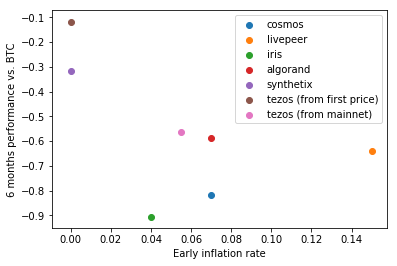

In [7]:
for network in df_inf_perf.index: 
    x = df_inf_perf['Early_InflationRate'][network]
    y = df_inf_perf['Change_BTCRate'][network]
    plt.scatter(x, y, label = df_inf_perf['Network'][network])
plt.xlabel("Early inflation rate")
plt.ylabel("6 months performance vs. BTC")
plt.rcParams["figure.figsize"] = (15,15)
plt.legend(loc=1)
plt.show()

Given the inconsistencies between networks detailed above, it is unwise to draw firm conclusions at this point. However, we note that:
- All the major proof-of-stake networks depreciated in value against BTC in the first 6 months of their existence. The native tokens of Cosmos and Iris lost over 80 and 90% of their value, respectively. 
- There is no strong correlation between the early inflation rate and subsequent price performance, positive or negative. Obviously, there are many other factors affecting the performance other than the genesis inflation rate.

We clearly need richer datasets, that provide other signals of 'success' other than price performance. The following timeseries datasets are courtesy of Staked's Yields API and Coinmarketcap. The most complete datasets are for three staking networks: _Tezos_, _Cosmos_, and _Livepeer_, and two older Proof-of-Work networks: _Horizen_ (formerly ZenCash) and _Dash_. 

In [8]:
df_tezos = pd.read_csv(r'df_tezos.csv')
df_cosmos = pd.read_csv(r'/Users/hassard/nucypher_repos/mint-paper/parametrization/df_cosmos.csv')
df_livepeer = pd.read_csv(r'/Users/hassard/nucypher_repos/mint-paper/parametrization/df_livepeer.csv')
df_horizen = pd.read_csv(r'/Users/hassard/nucypher_repos/mint-paper/parametrization/df_horizen.csv')
df_dash = pd.read_csv(r'/Users/hassard/nucypher_repos/mint-paper/parametrization/df_dash.csv')

df_livepeer.head() #inspect columns

,circulating_supply,currency,inflation,inflation_total,real_yield,staked_supply,staking_rate,timestamp,total_supply,yield,open,high,low,close,volume,Unnamed: 15
0,18855515,Livepeer,0.522615,0.522615,0.26823,12043330,0.63872,2020-01-27T23:26:03.149008,18855515,0.93102,2.54,3.14,1.84,2.48,7022,NaN
1,18830978,Livepeer,0.516869,0.516869,0.26563,12026078,0.63863,2020-01-26T23:26:06.706623,18830978,0.91979,2.39,2.53,1.90,2.53,3431,NaN
2,18800192,Livepeer,0.513845,0.513845,0.26522,11991463,0.63784,2020-01-25T23:26:08.583348,18800192,0.91535,2.40,2.40,2.31,2.39,950,NaN
3,18781135,Livepeer,0.508920,0.508920,0.26324,11974051,0.63756,2020-01-24T23:26:12.804559,18781135,0.90613,2.14,2.40,2.09,2.40,2090,NaN
4,18761640,Livepeer,0.504169,0.504169,0.26126,11957463,0.63734,2020-01-23T23:26:14.151584,18761640,0.89715,2.66,2.67,2.13,2.14,3093,NaN


In [9]:
df_cosmos.describe()

,circulating_supply,inflation,inflation_total,real_yield,staked_supply,staking_rate,total_supply,yield,open,high,low,close,volume,market_cap
count,1.780000e+02,178.000000,178.000000,178.000000,1.780000e+02,178.000000,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02
mean,7.518555e+13,0.068857,0.068857,0.019572,5.382597e+13,0.780639,7.518555e+13,0.089792,3.435000,3.567079,3.307303,3.437303,1.486506e+08,6.554511e+08
std,1.127539e+14,0.001849,0.001849,0.009782,8.074047e+13,0.105051,1.127539e+14,0.012002,0.719444,0.733507,0.708058,0.715683,4.009033e+07,1.364132e+08
min,1.884775e+08,0.063987,0.063987,0.000750,1.727235e+08,0.698240,1.884775e+08,0.066570,1.950000,2.050000,1.910000,1.950000,6.844400e+07,3.714760e+08
25%,2.450326e+08,0.067955,0.067955,0.021195,1.807735e+08,0.725272,2.450326e+08,0.090282,2.910000,2.960000,2.752500,2.900000,1.200872e+08,5.532995e+08
50%,2.470992e+08,0.068976,0.068976,0.023780,1.853001e+08,0.730745,2.470992e+08,0.094200,3.435000,3.590000,3.310000,3.440000,1.383520e+08,6.561067e+08
75%,2.427500e+14,0.070251,0.070251,0.025018,1.700000e+14,0.750205,2.427500e+14,0.097862,4.020000,4.217500,3.902500,4.017500,1.742750e+08,7.657690e+08
max,2.450000e+14,0.071681,0.071681,0.028770,1.790000e+14,0.988070,2.450000e+14,0.102190,5.100000,5.290000,4.770000,5.080000,3.140994e+08,9.679921e+08


Key column definitions: 

**inflation** is the nominal inflation rate – the annual rate at which new tokens are minted and distributed, relative to the supply. This is the main parameter that the protocol designer can tune. 

**yield** is the percentage a service-provider hypothetically gains annually on their stake, given a certain staking rate. This relationship is tested below. 

**staking_rate** is the percentage of tokens staked (implying a committment to the duties of a service-provider and/or delegation to a service-provider), of the total supply, on a given day. Also known as the 'participation rate' or 'staking ratio' elsewhere.

**real_yield** is the actual annual gain made by actively staking service-providers, taking into account the fact that stakers are also diluted by changes to the circulating supply (just less so than non-stakers/'hodlers'). This is calculated as follows: 

$$ RealYield = \frac{(1 + Yield)}{(1 + Inflation)}- 1 $$

where 'Inflation' here incorporates other changes to the circulating supply besides the predictable minting of tokens through a reward schedule – for example, the release of locked tokens held by foundations.

Note that **open**, **high**, **low**, **close**, **volume**, and  **market_cap** columns are sourced from Coinmarketcap, and the rest from the Staked Yields API. 

Warning: some network statistics (such as yield) are NOT universally agreed, however these estimates have been calculated by a professional staking operation that currently stakes in all the networks in question, and hence reflects *an* authentic economic reality, if not *the* economic reality. 

In [10]:
pos = {}
pos['cosmos'] = df_cosmos
pos['livepeer'] = df_livepeer
pos['tezos'] = df_tezos
pos['horizen'] = df_horizen
pos['dash'] = df_dash

# check how far back each dataset goes from Jan 27th 2020, in days.
# Note that Dash goes back from Jan 20th, and some datasets have gaps (e.g. Cosmos is missing 4 days in Dec 19)
for net in pos: 
    print(net, len(pos[net]))

cosmos 178
livepeer 127
tezos 117
horizen 182
dash 156


To check we understand the system dynamics and the extent to which these dynamics are common to the networks, let's establish that the staking rate is correlated with the yield. 

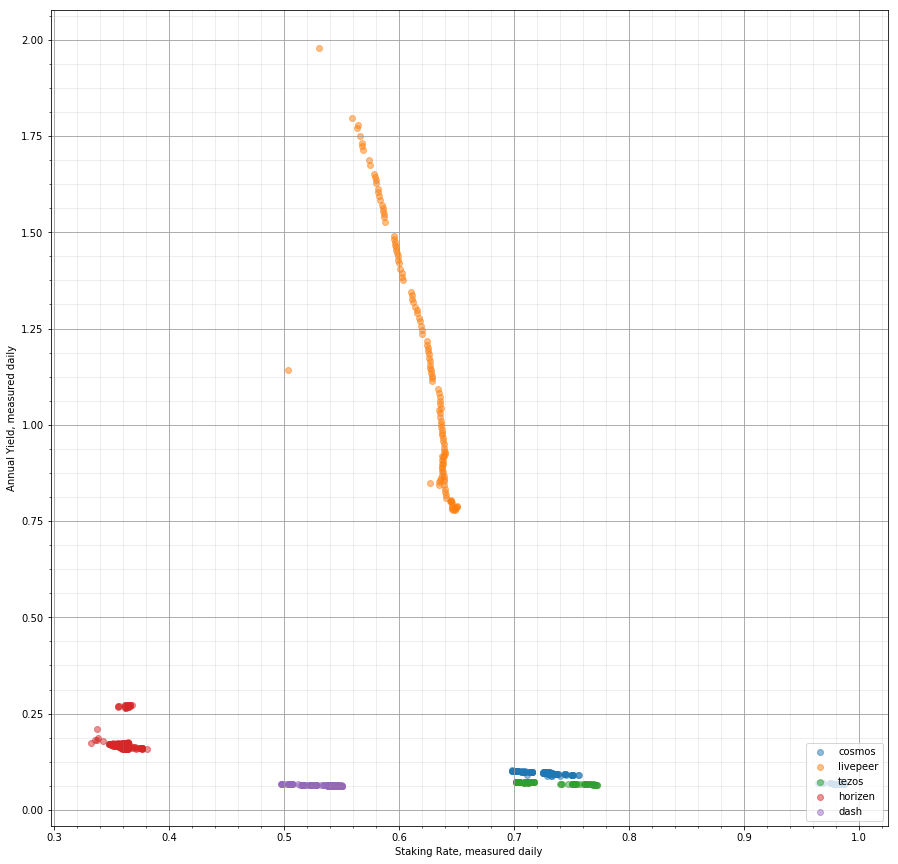

In [11]:
for net in pos: 
    x = pos[net]['staking_rate']
    y = pos[net]['yield']
    plt.scatter(x,y, label=net, alpha = 0.5)
plt.xlabel("Staking Rate, measured daily")
plt.ylabel("Annual Yield, measured daily")
plt.rcParams["figure.figsize"] = (15,15)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(loc=4)
plt.show()

In [12]:
# Remove _Livepeer_ and _Horizen_ to see the other networks more clearly. 
del pos['livepeer']
del pos['horizen']

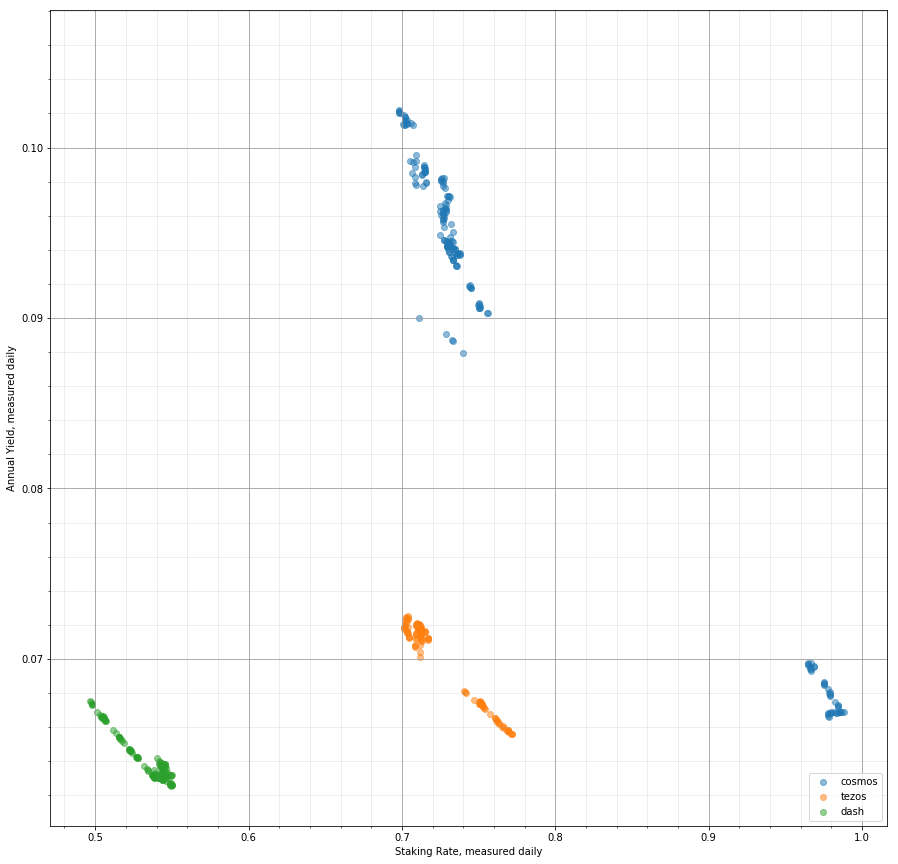

In [13]:
for net in pos: 
    x = pos[net]['staking_rate']
    y = pos[net]['yield']
    plt.scatter(x,y, label=net, alpha = 0.5)
plt.xlabel("Staking Rate, measured daily")
plt.ylabel("Annual Yield, measured daily")
plt.rcParams["figure.figsize"] = (15,15)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.legend(loc=4)
plt.show()

We can see that on a day-by-day basis, increases in the staking rate correpsond to decareases in the yield, for all the networks under examination. This is logical, since the greater the percentage of stakers/stake there is, the more thinly spread their rewards will be, all things equal. Although the independence of the nominal inflation rate does affect the linearity of this relationship, even Livepeer – which had the greatest, staking rate-driven change in inflation over the timeframe in question – demonstrates a similar, if curved, relationship.

To-do: prove this correlation has a low p-value. 

The previous two graphs show that the staking rate impacts the yield, which we know in turn is proportional to the **real yield** (see equation above). Let's flip this around and investigate if the real yield impacts the staking rate. In other words, test the hypothesis that the actual earnings by individual service-providers affects their decision to continue to stake. More specifically, that the mean real yield in one weekly (7-day) period impacts the staking rate in the following week. 

Remember our goal, stated above, is to find the _lowest possible inflation rate that does not compromise the abundance of supply or the operational feasibility of service-providers_. An indicator for both these compromises is the staking rate, from which we may learn the conditions that lead to it changing (particularly if it drops precipitously). 

In [14]:
# Hypothesis: the weekly real yield had an impact on next week's decision to stake
# We'll start with the Cosmos dataset then look at the other 4 networks

# Generate 7 day mean values for Cosmos's real yield: 24 weeks worth of data
cosmos_ry_weekly = df_cosmos['real_yield'].groupby(np.arange(len(df_cosmos))//7).mean()
# Ditto for the staking rate
cosmos_sr_weekly = df_cosmos['staking_rate'].groupby(np.arange(len(df_cosmos))//7).mean()
cosmos_c_weekly = df_cosmos['close'].groupby(np.arange(len(df_cosmos))//7).mean()
# Remove NaNs
cosmos_ry_weekly = cosmos_ry_weekly.loc[0:24]
cosmos_sr_weekly = cosmos_sr_weekly.loc[0:24]
cosmos_c_weekly = cosmos_c_weekly.loc[0:24]
# Reverse so bottom row is most recent week
cosmos_ry_weekly = cosmos_ry_weekly.iloc[::-1]
cosmos_sr_weekly = cosmos_sr_weekly.iloc[::-1]
cosmos_c_weekly = cosmos_c_weekly.iloc[::-1]

In [15]:
# Concatenate the series into a dataframe and shift staking_rate down
df_cosmos_rysr = pd.concat([cosmos_ry_weekly, cosmos_sr_weekly, cosmos_c_weekly], axis=1)
df_cosmos_rysr['real_yield'] = df_cosmos_rysr['real_yield'].shift(1)
df_cosmos_rysr['close'] = df_cosmos_rysr['close'].shift(1)

# Add Week Number columns for clarity
df_cosmos_rysr.insert(0, 'Week #, real_yield & close', np.arange(0, 25, 1))
df_cosmos_rysr.insert(2, 'Week #, staking_rate', np.arange (1, 26, 1))


# We now have a dataframe with columns out-of-sync by one week 
# – i.e. the second row (index 23) contains the real yield in week ONE, 
# and the staking rate in week TWO

# Compute week-on-week percentage change
df_cosmos_rysr['real_yield_%change'] = df_cosmos_rysr['real_yield'].pct_change()
df_cosmos_rysr['staking_rate_%change'] = df_cosmos_rysr['staking_rate'].pct_change()
df_cosmos_rysr['close_%change'] = df_cosmos_rysr['close'].pct_change()

df_cosmos_rysr

,"Week #, real_yield & close",real_yield,"Week #, staking_rate",staking_rate,close,real_yield_%change,staking_rate_%change,close_%change
24,0,NaN,1,0.702431,NaN,NaN,NaN,NaN
23,1,0.028230,2,0.699737,3.655714,NaN,-0.003836,NaN
22,2,0.028527,3,0.722181,3.377143,0.010526,0.032075,-0.076202
21,3,0.025609,4,0.729020,2.964286,-0.102309,0.009469,-0.122250
20,4,0.024646,5,0.728541,2.700000,-0.037599,-0.000656,-0.089157
19,5,0.024481,6,0.718839,2.161429,-0.006666,-0.013318,-0.199471
18,6,0.025616,7,0.714853,2.561429,0.046332,-0.005545,0.185063
17,7,0.026291,8,0.708940,3.258571,0.026379,-0.008271,0.272170
16,8,0.026616,9,0.715587,2.642857,0.012334,0.009376,-0.188952
15,9,0.025899,10,0.726814,2.448571,-0.026944,0.015689,-0.073514


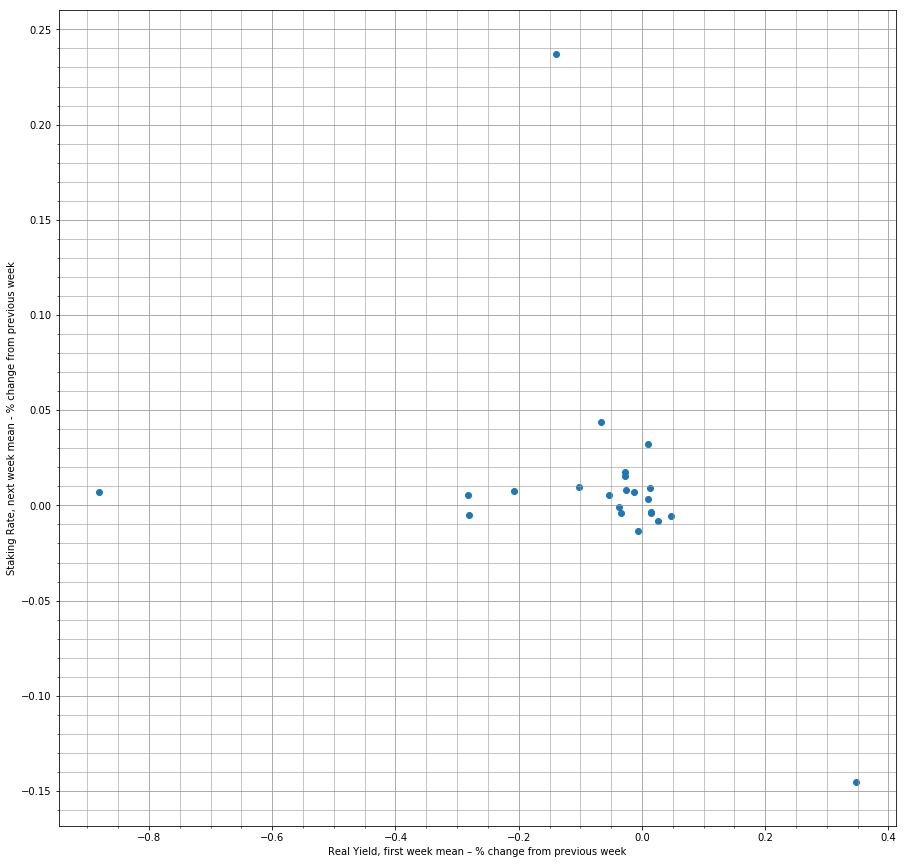

In [16]:
# Remove outliers
# df_cosmos_rysr[(np.abs(stats.zscore(df_cosmos_rysr)) < 3).all(axis=1)]

# Plot the percentage changes for real yield (week 1 -> week 2) and subsequent staking rate (week 2 -> week 3)
x = df_cosmos_rysr['real_yield_%change']
y = df_cosmos_rysr['staking_rate_%change']
plt.xlabel("Real Yield, first week mean – % change from previous week")
plt.ylabel("Staking Rate, next week mean - % change from previous week")
plt.rcParams["figure.figsize"] = (15,15)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.7)
plt.scatter(x,y)
plt.show()

Throughout the 24 weeks, the real yield is very low – averaging ~2% annually – less than one might expect in exchange for the efforts, risks and costs of staking. It also decreases week-on-week in 14 of the 23 weeks. Despite both these unfavourable metrics, the staking rate increases week-to-week more than it decreases, and by greater magnitudes. Assuming stakers considered reducing/increasing their stake at least once every 7 days, this data suggests that neither the actual inbound earnings nor the prospect of improved earnings in the short-term (based on recent observable trends), dampened their commitment to the Cosmos network. 

The mean weekly close price is included to give us a sense of the fiat value of the real yield. An upward trend in the ATOM/USD rate may also have brightened the prospects of future earnings – however, while Cosmos's native token did appreciate by about 15% against the dollar over the total timeframe, in the same 24 week period the real yield dropped a staggering 96%. 

To-do: Add a column to see the 'take-home earnings' (_weekly_ inflation rate, not annual), denominated in USD.

In [17]:
pos['livepeer'] = df_livepeer
pos['horizen'] = df_horizen

In [18]:
# Repeat exercise for all 5 networks

rysr_dict = {}

for net in pos:
    ry_weekly = pos[net]['real_yield'].groupby(np.arange(len(pos[net]))//7).mean()
    sr_weekly = pos[net]['staking_rate'].groupby(np.arange(len(pos[net]))//7).mean()

    ry_weekly = ry_weekly.iloc[::-1]
    sr_weekly = sr_weekly.iloc[::-1]
    
    df_rysr = pd.concat([ry_weekly, sr_weekly], axis=1)
    df_rysr['real_yield'] = df_rysr['real_yield'].shift(1)
    
    df_rysr['real_yield_%change'] = df_rysr['real_yield'].pct_change()
    df_rysr['staking_rate_%change'] = df_rysr['staking_rate'].pct_change()

    rysr_dict[net] = df_rysr

In [19]:
# To see other networks more clearly
del rysr_dict['cosmos']

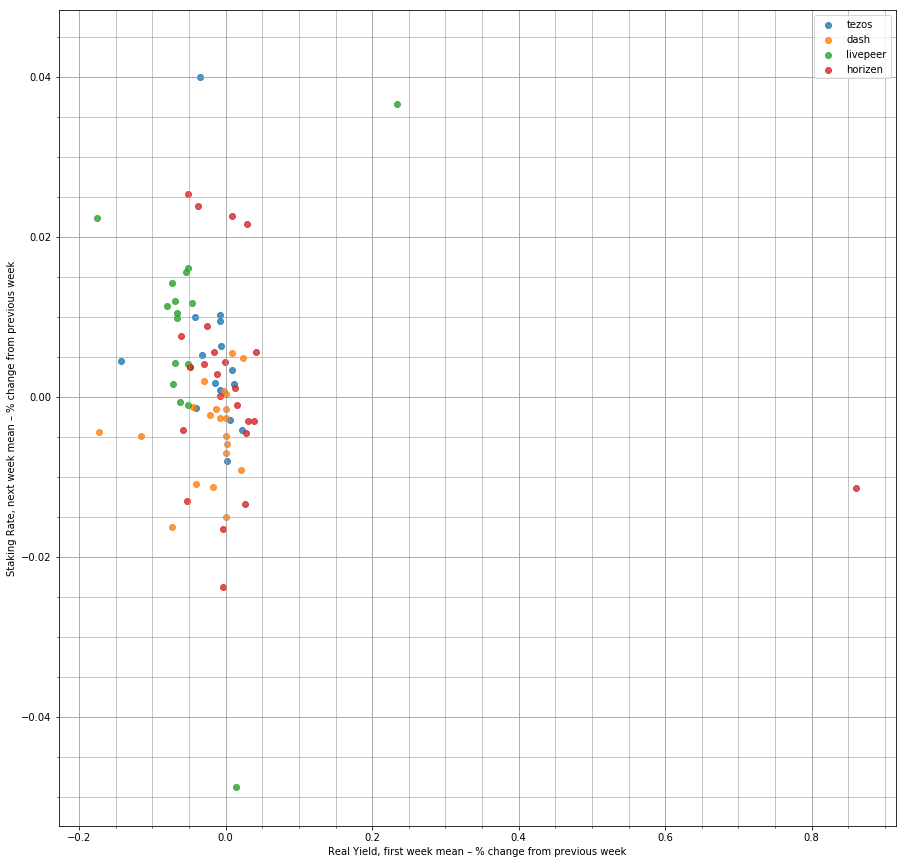

In [20]:
# Plot week-on-week percentage changes for real yield vs. next week's staking rate

for net in rysr_dict:
    x = rysr_dict[net]['real_yield_%change']
    y = rysr_dict[net]['staking_rate_%change']
    plt.scatter(x,y, label=net, alpha = 0.8)
plt.xlabel("Real Yield, first week mean – % change from previous week")
plt.ylabel("Staking Rate, next week mean – % change from previous week")
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.7)
plt.legend(loc=1)
plt.show()

Before interpreting this graph, a reminder that changes to the real yield do not have any programmatic, rules-based (i.e. protocol-driven) effect on the staking rate, whereas the reverse does. The collective, human decision-making of stakers ultimately determines the staking rate – i.e. every week, stakers (proactively or passively) choose to leave their stake untouched, stake more, re-stake or withdraw some or all of their stake. This exercise attempts to illuminate the extent to which this decision is affected by the change in real yield from the previous week to the current week.

By rough inspection:
- Observing all the networks' data together, we see a weak negative correlation. 
- The only network with a semblance of a positive correlation is Dash, which may be explained by the fact it is an older network. 
- Livepeer's real yield decreased almost every week, followed by an equally consistent increase in staking rate. This may be explained by the relatively high nominal inflation – although earnings are falling, they are still much higher than other networks.
- Horizen has the most variance in the polarity and amplitude of real yield changes, mirrored by its staking rate changes. 

(Big) caveats: 
- It's very possible that the impact of repeatedly low and/or decreasing real yield on staker decision-making occurs with a larger time delay than one week. 
- As mentioned above, the native token's value (especially sustained growth) may partially explain the low staker attrition rate.
- The rules around withdrawing rewards vary network to network. Commitment trends may be partially explained by strong incentives to 're-stake' rewards rather than withdraw, which, assuming this means a greater proportion of stakers are making a fiat loss and plan to hang around for the long term, makes changes to the real yield less important in the short term. 
- Relatedly, 'loyalty' to networks, despite low and/or falling earnings, cannot be simplistically categorized as irrational behavior, only explainable by altruism/enthusiasm/ideology. Rather, some non-negligble percentage of stakers are adopting a long-term strategy, similar to a early-stage investor, in which the bulk of ROI is expected many years down the road (and certainly not from every network in the portfolio). Indeed, some stakers are quite literally VCs. However, unlike investing in a conventional startup, staking requires the provision of a service, lest the stake suffer continual dilution. If the associated service costs far exceed remuneration via the real yield, then this long-term view may be unsustainable. Hence, the graph above gives us some insight into the loss tolerance of stakers.

To-do: compare typical service costs with the USD-denominated real yield on a network-by-network basis.

Weak conclusions, so far:
- We have not found any evidence that low inflation, yield or real yield has a damaging effect on staker commitment to the network – i.e. the abundance of supply. 
- The notion that 'stakers can only be counted on for a reliable service if they're well compensated' also seems to be false, given that none of the networks in question have experienced a shortfall of service-providers, nor any trends in that direction despite low or decreasing compensation. 

To-do: Deeper analysis of staking rate and real yield – e.g. use moving weekly mean with daily data.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

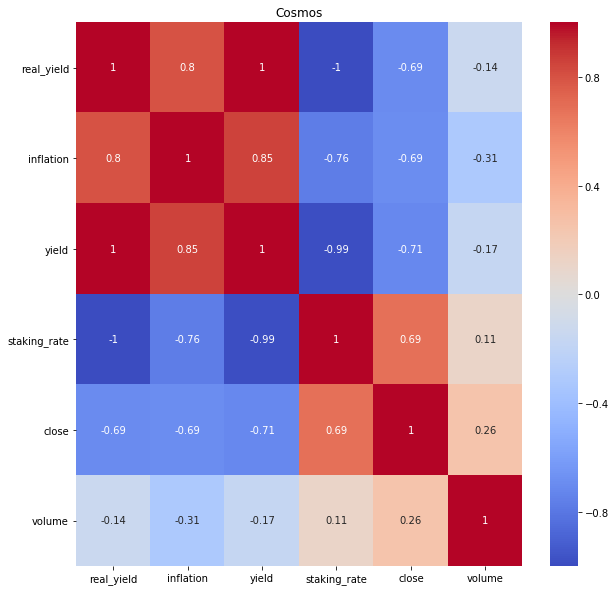

In [21]:
# Taking a cursory glance at the correlation between important staking network statistics. 

# Cosmos
df_cosmos_impt = df_cosmos[['real_yield','inflation','yield', 'staking_rate','close', 'volume']]
cosmos_corr = df_cosmos_impt.corr()
plt.title('Cosmos')
sns.heatmap(cosmos_corr, annot = True, cmap = 'coolwarm')
plt.yticks(rotation = 0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

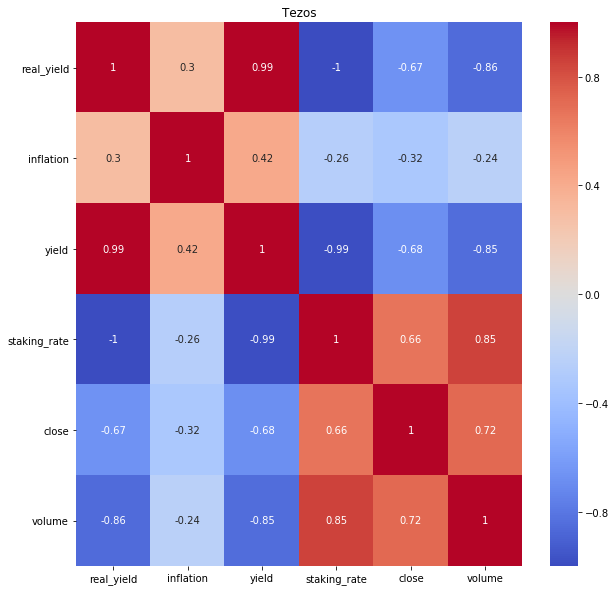

In [22]:
# Tezos
df_tezos_impt = df_tezos[['real_yield','inflation','yield', 'staking_rate','close', 'volume']]
tezos_corr = df_tezos_impt.corr()
sns.heatmap(tezos_corr, annot = True, cmap = 'coolwarm')
plt.title('Tezos')
plt.yticks(rotation = 0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

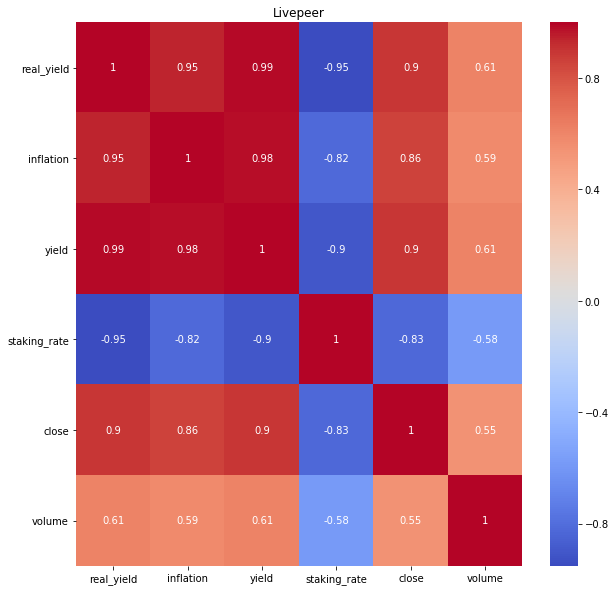

In [23]:
# Livepeer
df_livepeer_impt = df_livepeer[['real_yield','inflation','yield', 'staking_rate','close', 'volume']]
livepeer_corr = df_livepeer_impt.corr()
plt.title('Livepeer')
sns.heatmap(livepeer_corr, annot = True, cmap = 'coolwarm')
plt.yticks(rotation = 0)

Notable correlations (besides what we've already established):
- As expected, the inflation and staking rate are negatively correlated for Cosmos and Livepeer, but not Tezos. The latter does not have a protocol mechanism which links these two rates. 
- There is a mildly positive relationship between the staking rate and close price for Cosmos and Tezos. Since a higher staking rate can be interpreted as a healthy, well-populated supply, this might be a (simplistic) reason to have greater confidence in the future success of the network. Conversely, in Livepeer's case there's a strong negative correlation between the staking rate and the closing price, and a commensurately positive correlation between the staking rate and the inflation, yield, and real yield. This is not easily explainable and needs further investigaton. 
- The volume (trading activity) doesn't have a strong correlation with most variables. The notable exception is Tezos, where the volume is positively correlated with the staking rate. The greater the percentage of tokens locked, the fewer tokens are freely tradeable – this is non-intuitive and needs a closer look.
- The almost perfect correlation between the real yield and yield suggests that dilution caused by factors other than 'official' inflationary rewards are close to negligible over this timeframe – thankfully, because this would impose a difficult-to-attribute skew on the data. 

Problems:
- It appears at first glance that the data is non-stationary – in other words, it has some time dependent structure which can make correlations between statistics misleading. Thinking about this qualitatively, it is cerainly conceivable that external, macro phenomena may be affecting the trends in 'independent' network statistics in a similar/concurrent manner – for example, increasing enthusiasm for decentralized projects would be manifest itself in both the staking rate and close price rising over time - and mislead us into thinking one is causing the other. Another common time-dependent structure is seasonality – however, on the face of it, this is less likely to be true for staker/cryptomarket behavior. 
- This simple correlation method evaluates daily data against data from the same day. If a change in one variable does indeed cause a change in another, this may occur with a lag of (as yet) unknown duration – potentially the time it takes a human staker to make a decision.

In [24]:
#Augmented Dickey-Fuller test for trend stationarity
from statsmodels.tsa.stattools import adfuller

# If the timeseries has a time dependent structure, then it is 'non-stationary'
# Our null hypothesis (NH) is that the timeseries has a unit root (i.e. it's non-stationary)
# If we fail to reject the NH, then the timeseries data is not very useful as-is
# We can fully reject the NH if the p-value <= 0.05 
# AND test stat <= critical values (5% confidence interval)

def adftest(network_stat):
    adf = adfuller(network_stat)
    output = pd.Series(adf[0:2], index=['test_statistic','p_value'])
    for key,value in adf[4].items():
        output['critical_value (%s)'%key] = value
    print(output)
    if output['test_statistic'] <= output['critical_value (5%)'] and output['p_value'] <= 0.05:
        print('Result: Reject Null Hypothesis')
    else:
        print('Result: Accept Null Hypothesis')

In [25]:
# temporarily avoid running into error: exog contains infs or nans with Cosmos & Dash
del pos['cosmos']
del pos['dash']

#for net in pos:
 #   pos[net].replace([np.inf, -np.inf], np.nan)
 #   pos[net].dropna()

In [26]:
for net in pos:
    print(net)
    print('real yield')
    adftest(pos[net]['real_yield'])
    print(' ')
    print('staking rate')
    adftest(pos[net]['staking_rate'])
    print(' ')
    print('closing price')
    adftest(pos[net]['close'])
    print(' ')
    print(' ')

tezos
Real Yield
test_statistic         -1.752229
p_value                 0.404423
critical_value (1%)    -3.488022
critical_value (5%)    -2.886797
critical_value (10%)   -2.580241
dtype: float64
Result: Accept Null Hypothesis
 
Staking Rate
test_statistic         -1.824365
p_value                 0.368434
critical_value (1%)    -3.488022
critical_value (5%)    -2.886797
critical_value (10%)   -2.580241
dtype: float64
Result: Accept Null Hypothesis
 
Closing Price
test_statistic         -2.389174
p_value                 0.144815
critical_value (1%)    -3.488022
critical_value (5%)    -2.886797
critical_value (10%)   -2.580241
dtype: float64
Result: Accept Null Hypothesis
 
 
livepeer
Real Yield
test_statistic          2.771400
p_value                 1.000000
critical_value (1%)    -3.486056
critical_value (5%)    -2.885943
critical_value (10%)   -2.579785
dtype: float64
Result: Accept Null Hypothesis
 
Staking Rate
test_statistic          1.475843
p_value                 0.997433
cri

Of all the important network statistics, only the closing price of Horizen's token is stationary, according to the ADF test.

To-dos: 
- Other tests for stationarity (KPSS)
- Diferencing/detrending in order to increase stationarity
- Possibly relevant: multivariate ARIMA or autoregressive distributed lag

#### Notes / in-progress

In [31]:
#KPSS test for trend stationarity
from statsmodels.tsa.stattools import kpss

# null hypothesis (NH) is that the data is stationary around a *constant*

def kpss_constant(network_stat):
    kpsstest = kpss(network_stat, regression='c')
    output = pd.Series(kpsstest[0:3], index=['test_statistic','p_value','lags-used'])
    for key,value in kpsstest[3].items():
        output['critical_value (%s)'%key] = value 
    print(output)
    
# null hypothesis (NH) is that the data is stationary around a *trend* 
    
def kpss_trend(network_stat):
    kpsstest = kpss(network_stat, regression='ct')
    output = pd.Series(kpsstest[0:3], index=['test_statistic','p_value','lags-used'])
    for key,value in kpsstest[3].items():
        output['critical_value (%s)'%key] = value
    print(output)

In [28]:
#sns.set(style="ticks", color_codes=True)
#cosmos = sns.load_dataset(df_cosmos_impt)
#g = sns.pairplot(cosmos)#
# plt.show()

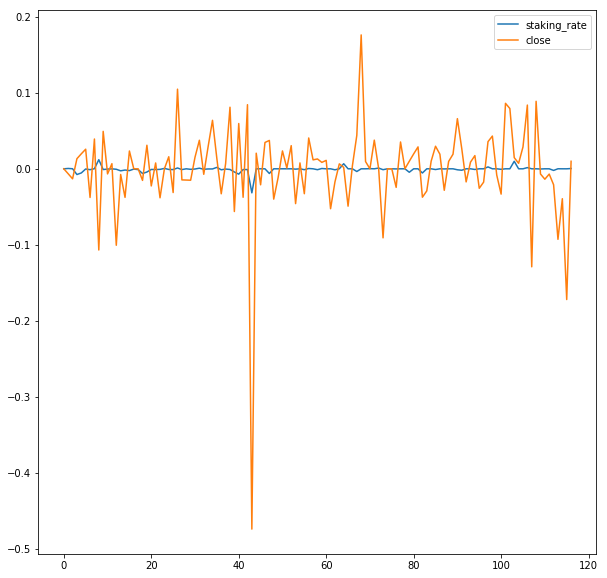

In [29]:
#log transform for easier inspection 

plt.plot(df_tezos['staking_rate'].pct_change().fillna(0))
plt.plot(df_tezos['close'].pct_change().fillna(0))
plt.legend()
plt.show()

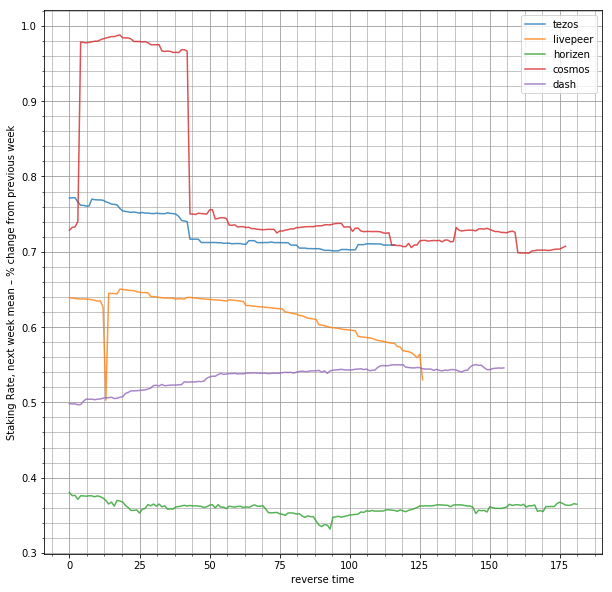

In [30]:
pos['cosmos'] = df_cosmos
pos['dash'] = df_dash

for net in pos:
    plt.plot(pos[net]['staking_rate'], label=net, alpha = 0.8)
plt.xlabel("reverse time")
plt.ylabel("Staking Rate, next week mean – % change from previous week")
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.7)
plt.legend(loc=1)
plt.show()